# Data Manipulation
:label:`sec_ndarray`

In order to get anything done, 
we need some way to store and manipulate data.
Generally, there are two important things 
we need to do with data: 
(i) acquire them; 
and (ii) process them once they are inside the computer. 
There is no point in acquiring data 
without some way to store it, 
so to start, let's get our hands dirty
with $n$-dimensional arrays, 
which we also call *tensors*.
If you already know the NumPy 
scientific computing package, 
this will be a breeze.
For all modern deep learning frameworks,
the *tensor class* (`ndarray` in MXNet, 
`Tensor` in PyTorch and TensorFlow) 
resembles NumPy's `ndarray`,
with a few killer features added.
First, the tensor class
supports automatic differentiation.
Second, it leverages GPUs
to accelerate numerical computation,
whereas NumPy only runs on CPUs.
These properties make neural networks
both easy to code and fast to run.



## Getting Started


(**To start, we import the PyTorch library.
Note that the package name is `torch`.**)


In [1]:
import torch

[**A tensor represents a (possibly multidimensional) array of numerical values.**]
In the one-dimensional case, i.e., when only one axis is needed for the data,
a tensor is called a *vector*.
With two axes, a tensor is called a *matrix*.
With $k > 2$ axes, we drop the specialized names
and just refer to the object as a $k^\textrm{th}$-*order tensor*.


PyTorch provides a variety of functions 
for creating new tensors 
prepopulated with values. 
For example, by invoking `arange(n)`,
we can create a vector of evenly spaced values,
starting at 0 (included) 
and ending at `n` (not included).
By default, the interval size is $1$.
Unless otherwise specified, 
new tensors are stored in main memory 
and designated for CPU-based computation.


In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

Each of these values is called
an *element* of the tensor.
The tensor `x` contains 12 elements.
We can inspect the total number of elements 
in a tensor via its `numel` method.


In [3]:
x.numel()

12

(**We can access a tensor's *shape***) 
(the length along each axis)
by inspecting its `shape` attribute.
Because we are dealing with a vector here,
the `shape` contains just a single element
and is identical to the size.


In [4]:
x.shape

torch.Size([12])

We can [**change the shape of a tensor
without altering its size or values**],
by invoking `reshape`.
For example, we can transform 
our vector `x` whose shape is (12,) 
to a matrix `X`  with shape (3, 4).
This new tensor retains all elements
but reconfigures them into a matrix.
Notice that the elements of our vector
are laid out one row at a time and thus
`x[3] == X[0, 3]`.


In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Note that specifying every shape component
to `reshape` is redundant.
Because we already know our tensor's size,
we can work out one component of the shape given the rest.
For example, given a tensor of size $n$
and target shape ($h$, $w$),
we know that $w = n/h$.
To automatically infer one component of the shape,
we can place a `-1` for the shape component
that should be inferred automatically.
In our case, instead of calling `x.reshape(3, 4)`,
we could have equivalently called `x.reshape(-1, 4)` or `x.reshape(3, -1)`.

Practitioners often need to work with tensors
initialized to contain all 0s or 1s.
[**We can construct a tensor with all elements set to 0**] (~~or one~~)
and a shape of (2, 3, 4) via the `zeros` function.


In [3]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [4]:
tensor=torch.tensor([[[1,2,3],
                      [4,5,6],
                      [2,4,8]]])

In [13]:
ten1=torch.tensor([7]) #this is a vector with one component ndim=1
ten2=torch.tensor(7) # this is a scalar ndim=0

ten1.shape,ten2.shape
ten1.ndim, ten2.ndim

(1, 0)

In [6]:
tensor.shape

torch.Size([1, 3, 3])

Similarly, we can create a tensor 
with all 1s by invoking `ones`.


In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

We often wish to 
[**sample each element randomly (and independently)**] 
from a given probability distribution.
For example, the parameters of neural networks
are often initialized randomly.
The following snippet creates a tensor 
with elements drawn from 
a standard Gaussian (normal) distribution
with mean 0 and standard deviation 1.


In [14]:
torch.rand(3, 4,3) #generates a tensor of shape (3, 4, 3) filled with random numbers drawn from a uniform distribution over the interval [0,1)]

tensor([[[0.9531, 0.8242, 0.0789],
         [0.7396, 0.8031, 0.1492],
         [0.2380, 0.3564, 0.7343],
         [0.5187, 0.6328, 0.3483]],

        [[0.7116, 0.2065, 0.9926],
         [0.7668, 0.4130, 0.2743],
         [0.8024, 0.0662, 0.0535],
         [0.5377, 0.3670, 0.2612]],

        [[0.1419, 0.5728, 0.5454],
         [0.2193, 0.7477, 0.4452],
         [0.4584, 0.9817, 0.1367],
         [0.7069, 0.3459, 0.0218]]])

In [7]:
torch.randn(3, 4,3) #generates a tensor of shape (3, 4, 3) filled with random numbers drawn from a standard normal distribution (mean = 0, variance = 1).

tensor([[[ 1.7782,  1.6289, -0.4983],
         [ 1.2196,  0.0628, -2.2105],
         [-1.6888, -0.9638,  0.7809],
         [ 0.4890,  1.4705, -2.1912]],

        [[ 0.6799, -1.0303, -0.2609],
         [-0.5099,  0.2627, -0.1294],
         [-0.7342, -0.4030,  0.0502],
         [-0.0370,  0.4250,  1.2296]],

        [[ 0.4702,  1.3400,  0.0840],
         [-0.8706,  0.6263, -1.0948],
         [ 0.0257,  1.6698, -0.5459],
         [ 1.4377,  2.0713,  1.9311]]])

In [15]:
torch.randn(size=(3, 4,3)) #either way

tensor([[[-1.1772,  1.1057, -1.9606],
         [ 0.2824,  0.0237, -1.1283],
         [ 1.0563, -1.4019,  0.2008],
         [-0.6055, -0.3607, -0.0088]],

        [[-0.1260, -0.2408,  1.1548],
         [-1.1804, -0.0575, -0.1808],
         [-0.8598,  0.8117, -0.2064],
         [ 0.2217,  1.5472, -0.6723]],

        [[-1.0358,  0.3641, -0.2455],
         [-0.5308, -1.0396, -0.0999],
         [ 1.1846, -0.0992, -0.1019],
         [ 2.3767,  0.0076,  1.2918]]])

Finally, we can construct tensors by
[**supplying the exact values for each element**] 
by supplying (possibly nested) Python list(s) 
containing numerical literals.
Here, we construct a matrix with a list of lists,
where the outermost list corresponds to axis 0,
and the inner list corresponds to axis 1.


In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## Indexing and Slicing

As with  Python lists,
we can access tensor elements 
by indexing (starting with 0).
To access an element based on its position
relative to the end of the list,
we can use negative indexing.
Finally, we can access whole ranges of indices 
via slicing (e.g., `X[start:stop]`), 
where the returned value includes 
the first index (`start`) *but not the last* (`stop`).
Finally, when only one index (or slice)
is specified for a $k^\textrm{th}$-order tensor,
it is applied along axis 0.
Thus, in the following code,
[**`[-1]` selects the last row and `[1:3]`
selects the second and third rows**].


In [10]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

Beyond reading them, (**we can also *write* elements of a matrix by specifying indices.**)


In [11]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

If we want [**to assign multiple elements the same value,
we apply the indexing on the left-hand side 
of the assignment operation.**]
For instance, `[:2, :]`  accesses 
the first and second rows,
where `:` takes all the elements along axis 1 (column).
While we discussed indexing for matrices,
this also works for vectors
and for tensors of more than two dimensions.


In [12]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## Operations

Now that we know how to construct tensors
and how to read from and write to their elements,
we can begin to manipulate them
with various mathematical operations.
Among the most useful of these 
are the *elementwise* operations.
These apply a standard scalar operation
to each element of a tensor.
For functions that take two tensors as inputs,
elementwise operations apply some standard binary operator
on each pair of corresponding elements.
We can create an elementwise function 
from any function that maps 
from a scalar to a scalar.

In mathematical notation, we denote such
*unary* scalar operators (taking one input)
by the signature 
$f: \mathbb{R} \rightarrow \mathbb{R}$.
This just means that the function maps
from any real number onto some other real number.
Most standard operators, including unary ones like $e^x$, can be applied elementwise.


In [13]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

Likewise, we denote *binary* scalar operators,
which map pairs of real numbers
to a (single) real number
via the signature 
$f: \mathbb{R}, \mathbb{R} \rightarrow \mathbb{R}$.
Given any two vectors $\mathbf{u}$ 
and $\mathbf{v}$ *of the same shape*,
and a binary operator $f$, we can produce a vector
$\mathbf{c} = F(\mathbf{u},\mathbf{v})$
by setting $c_i \gets f(u_i, v_i)$ for all $i$,
where $c_i, u_i$, and $v_i$ are the $i^\textrm{th}$ elements
of vectors $\mathbf{c}, \mathbf{u}$, and $\mathbf{v}$.
Here, we produced the vector-valued
$F: \mathbb{R}^d, \mathbb{R}^d \rightarrow \mathbb{R}^d$
by *lifting* the scalar function
to an elementwise vector operation.
The common standard arithmetic operators
for addition (`+`), subtraction (`-`), 
multiplication (`*`), division (`/`), 
and exponentiation (`**`)
have all been *lifted* to elementwise operations
for identically-shaped tensors of arbitrary shape.


In [71]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y #x*y element-wise multiplication, if you want matrice multiplication x.shape=(n,m) and y.shape=(m,p), use torch.matmul (x,y) or x @ y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [74]:
x.dtype,y.dtype

(torch.float32, torch.int64)

In [76]:
torch.mm(x,y.type(torch.float32))

RuntimeError: self must be a matrix

In [17]:
x.dtype #to inquiry the datatype, unless you specify another, the default is float32

torch.float32

In [82]:
my_first_tens  = torch.arange(60. , dtype=torch.float32).reshape(4, 5,3)
my_second_tens = torch.arange(18. ,  dtype=torch.float32).reshape(3,6)


result = torch.matmul(my_first_tens, my_second_tens)

result

tensor([[[  30.,   33.,   36.,   39.,   42.,   45.],
         [  84.,   96.,  108.,  120.,  132.,  144.],
         [ 138.,  159.,  180.,  201.,  222.,  243.],
         [ 192.,  222.,  252.,  282.,  312.,  342.],
         [ 246.,  285.,  324.,  363.,  402.,  441.]],

        [[ 300.,  348.,  396.,  444.,  492.,  540.],
         [ 354.,  411.,  468.,  525.,  582.,  639.],
         [ 408.,  474.,  540.,  606.,  672.,  738.],
         [ 462.,  537.,  612.,  687.,  762.,  837.],
         [ 516.,  600.,  684.,  768.,  852.,  936.]],

        [[ 570.,  663.,  756.,  849.,  942., 1035.],
         [ 624.,  726.,  828.,  930., 1032., 1134.],
         [ 678.,  789.,  900., 1011., 1122., 1233.],
         [ 732.,  852.,  972., 1092., 1212., 1332.],
         [ 786.,  915., 1044., 1173., 1302., 1431.]],

        [[ 840.,  978., 1116., 1254., 1392., 1530.],
         [ 894., 1041., 1188., 1335., 1482., 1629.],
         [ 948., 1104., 1260., 1416., 1572., 1728.],
         [1002., 1167., 1332., 1497., 16

In [80]:
result.shape

torch.Size([4, 5, 6])

In [26]:
zero_to_thousand=torch.arange(0,1001,50)
zero_to_thousand
zero_to_thousand.shape

torch.Size([21])

In [19]:
torch.__version__

'2.0.1+cpu'

In [25]:
zeros_like=torch.zeros_like(zero_to_thousand)
zeros_like.shape

torch.Size([21])

### Tensor datatypes

**Note:** Tensor datatypes is one of the 3 big errors you' ll run into with PyTorch
1. Tensor not right datatype
2. Tensor not right shape
3. Tensor not on the right device (for example if one tensor lives on cpu, and the other on gpu, and you try some operations, you might run into errors)


In addition to elementwise computations,
we can also perform linear algebraic operations,
such as dot products and matrix multiplications.
We will elaborate on these
in :numref:`sec_linear-algebra`.

We can also [***concatenate* multiple tensors,**]
stacking them end-to-end to form a larger one.
We just need to provide a list of tensors
and tell the system along which axis to concatenate.
The example below shows what happens when we concatenate
two matrices along rows (axis 0)
instead of columns (axis 1).
We can see that the first output's axis-0 length ($6$)
is the sum of the two input tensors' axis-0 lengths ($3 + 3$);
while the second output's axis-1 length ($8$)
is the sum of the two input tensors' axis-1 lengths ($4 + 4$).

In [203]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4)) #you can change the datatype to float16, float64, 
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [205]:
Z=torch.cat((X, Y), dim=0) #cat is different fron stack
Z.shape

torch.Size([6, 4])

In [32]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [36]:
x_float16= X.type(torch.float16)
x_float16
x_float16.dtype

torch.float16

In [35]:
X*x_float16

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])

### To get information from a tensor (tensor attributes)
`x.device`

`x.dtype`

`x.shape`

### Tensor multiplication
#### element wise
#### Matrix multiplication (dot wise) (n,m) dot (m,p)= (n,p)

In [38]:
vec1=torch.tensor([1,2,3])
vec2=torch.tensor([2,3,4])
vec3=vec1*vec2 #this is element wise multiplication
vec4=torch.matmul(vec1,vec2) # this is matrix multiplication 

In [39]:
print(vec3), 
print(vec4)

tensor([ 2,  6, 12])
tensor(20)


In [44]:
%%time
matrix1=torch.randn(3,4)
matrix2=torch.randn(4,5)
matrix3=torch.matmul(matrix1, matrix2) #this will run without error, because the inner dimensions match 4==4
matrix31= matrix1 @ matrix2 # either way

print(matrix3)
print(matrix31)

tensor([[ 0.0107, -0.1403,  0.5225,  0.2271,  0.4562],
        [-1.5123, -0.4007, -1.0209,  2.9739, -1.4645],
        [-0.8624, -4.1877, -0.2863,  2.6682,  5.3995]])
tensor([[ 0.0107, -0.1403,  0.5225,  0.2271,  0.4562],
        [-1.5123, -0.4007, -1.0209,  2.9739, -1.4645],
        [-0.8624, -4.1877, -0.2863,  2.6682,  5.3995]])
CPU times: user 4.7 ms, sys: 67 µs, total: 4.76 ms
Wall time: 4.06 ms


In [43]:
matrix4=torch.matmul(matrix2, matrix1) #this will return an error, because the inner dimension does not match 5 != 3


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x5 and 3x4)

### Finding Min, Max, Mean, Sum, etc... (Tensor aggregation)

In [54]:
X=torch.arange(1,101,10)
print(X)
#min
print( 'min =' ,torch.min(X))
#max
print ('max=', torch.max(X))



tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])
min = tensor(1)
max= tensor(91)


In [56]:
#torch.mean(X.type(torch.long)) # mean function can't work with long datatype
torch.mean(X)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

### FInding the position of Min and Max

In [58]:
#FInd the position of the min of X
torch.argmin(X)

tensor(0)

In [59]:
#Find the position of the max of X
torch.argmax(X)

tensor(9)

### Reshaping, stacking, squeezing and unsqueezing tensors
**Reshaping**- reshapes an input tensor to a defined shape

**View** - return a view of an input tensor `x` of a certain shape and keep the same memory as the original tensor,  creates a new tensor `x_view` that shares the same underlying memory as the original tensor x. This means:

- Both `x` and `x_view` point to the same data in memory.

- If you change a value in `x_view`, the change will be reflected in x, and vice versa.

**Stacking** -Combine multiple tensors on top of each other (vstack) or side by side (hstack)

**Squeezes** -removes all `1` dimensions from a tensor

**Unsqueeze** -add a `1` dimension to a target tensor

**Permute** -Return a view of the input with dimensions permuted (swapped) in a certain way

In [86]:
x=torch.arange(1,60,3)
x,x.shape

(tensor([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
         55, 58]),
 torch.Size([20]))

In [84]:
x_reshaped=x.reshape(5,4) ## the shape must be compatible with he original size ie reshape(m,n) when m*n=original shape
x_reshaped, x_reshaped.shape

(tensor([[ 1,  4,  7, 10],
         [13, 16, 19, 22],
         [25, 28, 31, 34],
         [37, 40, 43, 46],
         [49, 52, 55, 58]]),
 torch.Size([5, 4]))

In [89]:
#change the view
x_view=x.view(4,5) # x_view chares the memory with the original tensor x, that means changing x_view also changes x
x_view , x_view.shape

(tensor([[ 1,  4,  7, 10, 13],
         [16, 19, 22, 25, 28],
         [31, 34, 37, 40, 43],
         [46, 49, 52, 55, 58]]),
 torch.Size([4, 5]))

In [91]:
x_view[0,0]=5
x_view,x

(tensor([[ 5,  4,  7, 10, 13],
         [16, 19, 22, 25, 28],
         [31, 34, 37, 40, 43],
         [46, 49, 52, 55, 58]]),
 tensor([ 5,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
         55, 58]))

If you want a new tensor that does not share memory with `x`, use `x.clone` or `x.detach.clone()` 

In [94]:
x_clone=x.clone()
x_clone_view=x_clone.view(4,5)
x_clone_view[0,3]=9
x_clone_view, x

(tensor([[ 5,  4,  7,  9, 13],
         [16, 19, 22, 25, 28],
         [31, 34, 37, 40, 43],
         [46, 49, 52, 55, 58]]),
 tensor([ 5,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
         55, 58]))

In [104]:
# Stack tensors on top of each other
x_stacked=torch.stack([x,x,x,x],dim=0)
x_stacked, x_stacked.shape

(tensor([[ 5,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
          55, 58],
         [ 5,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
          55, 58],
         [ 5,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
          55, 58],
         [ 5,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52,
          55, 58]]),
 torch.Size([4, 20]))

In [115]:
# Create a tensor 'a' from 20 to 98 stepping by 3
a = torch.arange(20, 100, 3)

# Reshape 'a' to shape (3, 9)
a_reshaped = a.reshape(3, 9)

# Create another tensor 'b' of shape (3, 9), 
b = torch.linspace(100,178,27)
b_reshaped=b.reshape(3,9)

print('a_reshaped shape:', a_reshaped.shape)
print('b_reshaped shape', b_reshaped.shape)


a_reshaped shape: torch.Size([3, 9])
b_reshaped shape torch.Size([3, 9])


In [119]:
stack_dim0 = torch.stack([a_reshaped, b_reshaped], dim=0)
print(stack_dim0,stack_dim0.shape)  # torch.Size([2, 3, 9])

tensor([[[ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.],
         [ 47.,  50.,  53.,  56.,  59.,  62.,  65.,  68.,  71.],
         [ 74.,  77.,  80.,  83.,  86.,  89.,  92.,  95.,  98.]],

        [[100., 103., 106., 109., 112., 115., 118., 121., 124.],
         [127., 130., 133., 136., 139., 142., 145., 148., 151.],
         [154., 157., 160., 163., 166., 169., 172., 175., 178.]]]) torch.Size([2, 3, 9])


In [120]:
stack_dim0 = torch.stack([a_reshaped, b_reshaped], dim=1)
print(stack_dim0,stack_dim0.shape)  # torch.Size([3, 2, 9])

tensor([[[ 20.,  23.,  26.,  29.,  32.,  35.,  38.,  41.,  44.],
         [100., 103., 106., 109., 112., 115., 118., 121., 124.]],

        [[ 47.,  50.,  53.,  56.,  59.,  62.,  65.,  68.,  71.],
         [127., 130., 133., 136., 139., 142., 145., 148., 151.]],

        [[ 74.,  77.,  80.,  83.,  86.,  89.,  92.,  95.,  98.],
         [154., 157., 160., 163., 166., 169., 172., 175., 178.]]]) torch.Size([3, 2, 9])


In [123]:
stack_dim2= torch.stack([a_reshaped, b_reshaped], dim=2)
print(stack_dim2,stack_dim2.shape)  # torch.Size([3, 9, 2])

tensor([[[ 20., 100.],
         [ 23., 103.],
         [ 26., 106.],
         [ 29., 109.],
         [ 32., 112.],
         [ 35., 115.],
         [ 38., 118.],
         [ 41., 121.],
         [ 44., 124.]],

        [[ 47., 127.],
         [ 50., 130.],
         [ 53., 133.],
         [ 56., 136.],
         [ 59., 139.],
         [ 62., 142.],
         [ 65., 145.],
         [ 68., 148.],
         [ 71., 151.]],

        [[ 74., 154.],
         [ 77., 157.],
         [ 80., 160.],
         [ 83., 163.],
         [ 86., 166.],
         [ 89., 169.],
         [ 92., 172.],
         [ 95., 175.],
         [ 98., 178.]]]) torch.Size([3, 9, 2])


In [125]:
stack_dim3= torch.stack([a_reshaped, b_reshaped], dim=3)
print(stack_dim0,stack_dim0.shape)  # error message because 3 is out of range of ndim==2 for a_reshaped and b_reshaped

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

In [144]:
##Another example

# Create a tensor 'a' from 20 to 98 stepping by 3
c = torch.arange(20, 120, 5)
c_reshaped = c.reshape(4, 5)


d = torch.linspace(121,140,20)
d_reshaped=d.reshape(4,5)

print('c_reshaped shape:', c_reshaped.shape)
print('d_reshaped shape', d_reshaped.shape)

c_reshaped shape: torch.Size([4, 5])
d_reshaped shape torch.Size([4, 5])


In [145]:
c_reshaped,d_reshaped

(tensor([[ 20,  25,  30,  35,  40],
         [ 45,  50,  55,  60,  65],
         [ 70,  75,  80,  85,  90],
         [ 95, 100, 105, 110, 115]]),
 tensor([[121., 122., 123., 124., 125.],
         [126., 127., 128., 129., 130.],
         [131., 132., 133., 134., 135.],
         [136., 137., 138., 139., 140.]]))

In [146]:
stack_dim0 = torch.stack([c_reshaped, d_reshaped], dim=0)
print(stack_dim0,stack_dim0.shape)  # torch.Size([2, 4, 5])

tensor([[[ 20.,  25.,  30.,  35.,  40.],
         [ 45.,  50.,  55.,  60.,  65.],
         [ 70.,  75.,  80.,  85.,  90.],
         [ 95., 100., 105., 110., 115.]],

        [[121., 122., 123., 124., 125.],
         [126., 127., 128., 129., 130.],
         [131., 132., 133., 134., 135.],
         [136., 137., 138., 139., 140.]]]) torch.Size([2, 4, 5])


In [148]:
stack_dim1= torch.stack([c_reshaped, d_reshaped], dim=1)
print(stack_dim1,stack_dim1.shape)  # torch.Size([4, 2, 5])

tensor([[[ 20.,  25.,  30.,  35.,  40.],
         [121., 122., 123., 124., 125.]],

        [[ 45.,  50.,  55.,  60.,  65.],
         [126., 127., 128., 129., 130.]],

        [[ 70.,  75.,  80.,  85.,  90.],
         [131., 132., 133., 134., 135.]],

        [[ 95., 100., 105., 110., 115.],
         [136., 137., 138., 139., 140.]]]) torch.Size([4, 2, 5])


In [150]:
stack_dim2= torch.stack([c_reshaped, d_reshaped], dim=2)
print(stack_dim2,stack_dim2.shape)  # torch.Size([4, 5, 2])

tensor([[[ 20., 121.],
         [ 25., 122.],
         [ 30., 123.],
         [ 35., 124.],
         [ 40., 125.]],

        [[ 45., 126.],
         [ 50., 127.],
         [ 55., 128.],
         [ 60., 129.],
         [ 65., 130.]],

        [[ 70., 131.],
         [ 75., 132.],
         [ 80., 133.],
         [ 85., 134.],
         [ 90., 135.]],

        [[ 95., 136.],
         [100., 137.],
         [105., 138.],
         [110., 139.],
         [115., 140.]]]) torch.Size([4, 5, 2])


In [223]:
cat0= torch.cat([c_reshaped, d_reshaped], dim=1)
print(cat0,cat0.shape)  # torch.Size([4, 5, 2])

tensor([[ 20.,  25.,  30.,  35.,  40., 121., 122., 123., 124., 125.],
        [ 45.,  50.,  55.,  60.,  65., 126., 127., 128., 129., 130.],
        [ 70.,  75.,  80.,  85.,  90., 131., 132., 133., 134., 135.],
        [ 95., 100., 105., 110., 115., 136., 137., 138., 139., 140.]]) torch.Size([4, 10])


In [226]:
c_reshaped.reshape(-1,1).shape

torch.Size([20, 1])

In [228]:
c_reshaped.shape

torch.Size([4, 5])

In [230]:
my_vec1 =  torch.arange(10.)
my_vec2 =  my_vec1.view(2,5)
my_vec1,my_vec2

(tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([[0., 1., 2., 3., 4.],
         [5., 6., 7., 8., 9.]]))

In [231]:
my_vec1[0]= -100
my_vec1 , my_vec2

(tensor([-100.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.]),
 tensor([[-100.,    1.,    2.,    3.,    4.],
         [   5.,    6.,    7.,    8.,    9.]]))

In [ ]:
my_vec1.view(2,5) , 

In [ ]:
my_second_tens

In [157]:
##Another example

e = torch.arange(20, 95, 5)
e_reshaped = e.reshape(3, 5)


f = torch.linspace(121,135,15)
f_reshaped=f.reshape(3,5)

g = torch.arange(150,225,5)
g_reshaped=g.reshape(3,5)



print('e_reshaped shape:', e_reshaped.shape)
print('f_reshaped shape', f_reshaped.shape)
print('g_reshaped shape', g_reshaped.shape)


e_reshaped shape: torch.Size([3, 5])
f_reshaped shape torch.Size([3, 5])
g_reshaped shape torch.Size([3, 5])


In [158]:
e_reshaped,f_reshaped,g_reshaped

(tensor([[20, 25, 30, 35, 40],
         [45, 50, 55, 60, 65],
         [70, 75, 80, 85, 90]]),
 tensor([[121., 122., 123., 124., 125.],
         [126., 127., 128., 129., 130.],
         [131., 132., 133., 134., 135.]]),
 tensor([[150, 155, 160, 165, 170],
         [175, 180, 185, 190, 195],
         [200, 205, 210, 215, 220]]))

In [160]:
stack_dim0= torch.stack([e_reshaped, f_reshaped,g_reshaped], dim=0)
print(stack_dim0,stack_dim0.shape)  # torch.Size([3, 3, 5])

tensor([[[ 20.,  25.,  30.,  35.,  40.],
         [ 45.,  50.,  55.,  60.,  65.],
         [ 70.,  75.,  80.,  85.,  90.]],

        [[121., 122., 123., 124., 125.],
         [126., 127., 128., 129., 130.],
         [131., 132., 133., 134., 135.]],

        [[150., 155., 160., 165., 170.],
         [175., 180., 185., 190., 195.],
         [200., 205., 210., 215., 220.]]]) torch.Size([3, 3, 5])


In [161]:
stack_dim1= torch.stack([e_reshaped, f_reshaped,g_reshaped], dim=1)
print(stack_dim1,stack_dim1.shape)  # torch.Size([3, 3, 5])

tensor([[[ 20.,  25.,  30.,  35.,  40.],
         [121., 122., 123., 124., 125.],
         [150., 155., 160., 165., 170.]],

        [[ 45.,  50.,  55.,  60.,  65.],
         [126., 127., 128., 129., 130.],
         [175., 180., 185., 190., 195.]],

        [[ 70.,  75.,  80.,  85.,  90.],
         [131., 132., 133., 134., 135.],
         [200., 205., 210., 215., 220.]]]) torch.Size([3, 3, 5])


In [162]:
stack_dim2= torch.stack([e_reshaped, f_reshaped,g_reshaped], dim=2)
print(stack_dim2,stack_dim2.shape)  # torch.Size([3, 5, 3]) ##ok

tensor([[[ 20., 121., 150.],
         [ 25., 122., 155.],
         [ 30., 123., 160.],
         [ 35., 124., 165.],
         [ 40., 125., 170.]],

        [[ 45., 126., 175.],
         [ 50., 127., 180.],
         [ 55., 128., 185.],
         [ 60., 129., 190.],
         [ 65., 130., 195.]],

        [[ 70., 131., 200.],
         [ 75., 132., 205.],
         [ 80., 133., 210.],
         [ 85., 134., 215.],
         [ 90., 135., 220.]]]) torch.Size([3, 5, 3])


### Squeeze (remove all single dimensions from a tensor)

In [178]:
x=torch.tensor([[[4,5,3,6,7,1,2,5,8,9]]])
print('x.shape is' , x.shape )           
x_squeeze=x.squeeze() 
print ('x_squeeze().shape is', x.squeeze().shape) #all the 1 have been removed

x.shape is torch.Size([1, 1, 10])
x_squeeze().shape is torch.Size([10])


In [181]:
# torch.unsqueeze() adds a single dimension to a target tensor
x_squeeze_unsqueeze=x_squeeze.unsqueeze(dim=1) # dim=0 add the zero th dim, dim=1 add the second dim
print ('x_squeeze_unsqueeze shape is', x_squeeze_unsqueeze.shape) 
print('x_squeeze_unsqueeze', x_squeeze_unsqueeze)

x_squeeze_unsqueeze shape is torch.Size([10, 1])
x_squeeze_unsqueeze tensor([[4],
        [5],
        [3],
        [6],
        [7],
        [1],
        [2],
        [5],
        [8],
        [9]])


In [182]:
# torch.permute -rearranges the dimension of a target order and returns a view of the tensor (remenber view shares memory with original tensor)
x=torch.rand(size=(224,224,3)) #[height, Width,colour_channels]
x.size()
#permute x to rearrange the axis (or dim) order
x_permuted=torch.permute(x,dims=(2,0,1)) #or x.permute(2,0,1)

In [183]:
print(f"previous shape:{x.shape}")
print(f"New shape:{x_permuted.shape}")

previous shape:torch.Size([224, 224, 3])
New shape:torch.Size([3, 224, 224])


In [185]:
#changing x_permutes also changes x
x_permuted[0,10,11]=100
x_permuted[0,10,11],x[10,11,0]

(tensor(100.), tensor(100.))

Sometimes, we want to 
[**construct a binary tensor via *logical statements*.**]
Take `X == Y` as an example.
For each position `i, j`, if `X[i, j]` and `Y[i, j]` are equal, 
then the corresponding entry in the result takes value `1`,
otherwise it takes value `0`.


In [16]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

[**Summing all the elements in the tensor**] yields a tensor with only one element.


In [17]:
X.sum()

tensor(66.)

## Broadcasting
:label:`subsec_broadcasting`

By now, you know how to perform 
elementwise binary operations
on two tensors of the same shape. 
Under certain conditions,
even when shapes differ, 
we can still [**perform elementwise binary operations
by invoking the *broadcasting mechanism*.**]
Broadcasting works according to 
the following two-step procedure:
(i) expand one or both arrays
by copying elements along axes with length 1
so that after this transformation,
the two tensors have the same shape;
(ii) perform an elementwise operation
on the resulting arrays.


In [186]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

Since `a` and `b` are $3\times1$ 
and $1\times2$ matrices, respectively,
their shapes do not match up.
Broadcasting produces a larger $3\times2$ matrix 
by replicating matrix `a` along the columns
and matrix `b` along the rows
before adding them elementwise.


In [187]:
a + b,a*b

(tensor([[0, 1],
         [1, 2],
         [2, 3]]),
 tensor([[0, 0],
         [0, 1],
         [0, 2]]))

### Indexing( select data from tensors)

In [202]:
stack_dim0, stack_dim0.shape

(tensor([[[ 20.,  25.,  30.,  35.,  40.],
          [ 45.,  50.,  55.,  60.,  65.],
          [ 70.,  75.,  80.,  85.,  90.]],
 
         [[121., 122., 123., 124., 125.],
          [126., 127., 128., 129., 130.],
          [131., 132., 133., 134., 135.]],
 
         [[150., 155., 160., 165., 170.],
          [175., 180., 185., 190., 195.],
          [200., 205., 210., 215., 220.]]]),
 torch.Size([3, 3, 5]))

In [191]:
stack_dim0[1,1,1],stack_dim0[1][1][1]# second value of the 0th dimension, 1 index value(2nd value) of the first and 2nd dimension.

(tensor(127.), tensor(127.))

In [193]:
stack_dim0[:,0,0],# all matrices first row, first column
stack_dim0[:][0][0], #stack_dim0[:] returns the whole tensor unchanged. this means all the matrices, first matrix, first row


tensor([121., 126., 131.])

In [196]:
stack_dim0[1][:][0], stack_dim0[1,0,:] #it is equivalent to stack_dim0[1,0,:]


(tensor([121., 122., 123., 124., 125.]),
 tensor([121., 122., 123., 124., 125.]))

In [201]:
stack_dim0[1,:,0]

tensor([121., 126., 131.])

## Saving Memory

[**Running operations can cause new memory to be
allocated to host results.**]
For example, if we write `Y = X + Y`,
we dereference the tensor that `Y` used to point to
and instead point `Y` at the newly allocated memory.
We can demonstrate this issue with Python's `id()` function,
which gives us the exact address 
of the referenced object in memory.
Note that after we run `Y = Y + X`,
`id(Y)` points to a different location.
That is because Python first evaluates `Y + X`,
allocating new memory for the result 
and then points `Y` to this new location in memory.


In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

This might be undesirable for two reasons.
First, we do not want to run around
allocating memory unnecessarily all the time.
In machine learning, we often have
hundreds of megabytes of parameters
and update all of them multiple times per second.
Whenever possible, we want to perform these updates *in place*.
Second, we might point at the 
same parameters from multiple variables.
If we do not update in place, 
we must be careful to update all of these references,
lest we spring a memory leak 
or inadvertently refer to stale parameters.


Fortunately, (**performing in-place operations**) is easy.
We can assign the result of an operation
to a previously allocated array `Y`
by using slice notation: `Y[:] = <expression>`.
To illustrate this concept, 
we overwrite the values of tensor `Z`,
after initializing it, using `zeros_like`,
to have the same shape as `Y`.


In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140381179266448
id(Z): 140381179266448


[**If the value of `X` is not reused in subsequent computations,
we can also use `X[:] = X + Y` or `X += Y`
to reduce the memory overhead of the operation.**]


In [22]:
before = id(X)
X += Y
id(X) == before

True

## Conversion to Other Python Objects


[**Converting to a NumPy tensor (`ndarray`)**], or vice versa, is easy.
The torch tensor and NumPy array 
will share their underlying memory, 
and changing one through an in-place operation 
will also change the other.


In [218]:
#Numpy to Tensor
A = X.numpy()
B = torch.from_numpy(A) #warning: when converting from numpy -> pytorch, it reflect float64 unless specified otherwise by .type(torch.float32)
type(A), type(B),B.dtype, A.dtype

(numpy.ndarray, torch.Tensor, torch.float32, dtype('float32'))

In [221]:
C=B.numpy() #and If we want to change a tensor into a numpy object
C,type( C)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32),
 numpy.ndarray)

### numpy object and tensor does not share memories, this means changing C wont affect B; and vice versa

To (**convert a size-1 tensor to a Python scalar**),
we can invoke the `item` function or Python's built-in functions.


In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## Random seed (Reproducibility)


In [234]:
Random_seed=42
torch.manual_seed(Random_seed)
random_tensor_c=torch.rand(3,4)

torch.manual_seed(Random_seed)
random_tensor_d=torch.rand(3,4)

print(random_tensor_c)
print(random_tensor_d)
print(random_tensor_c==random_tensor_d)


tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [236]:
Random_seed=45
torch.manual_seed(Random_seed)
random_tensor_c=torch.rand(3,5)

torch.manual_seed(Random_seed)
random_tensor_d=torch.rand(3,5)

print(random_tensor_c)
print(random_tensor_d)
print(random_tensor_c==random_tensor_d)


tensor([[0.1869, 0.9613, 0.6834, 0.8988, 0.0505],
        [0.5555, 0.7861, 0.0566, 0.7842, 0.1480],
        [0.0388, 0.1037, 0.4216, 0.2373, 0.8111]])
tensor([[0.1869, 0.9613, 0.6834, 0.8988, 0.0505],
        [0.5555, 0.7861, 0.0566, 0.7842, 0.1480],
        [0.0388, 0.1037, 0.4216, 0.2373, 0.8111]])
tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])


In [237]:
Random_seed=42
torch.manual_seed(Random_seed)
random_tensor_c=torch.rand(15)

torch.manual_seed(Random_seed)
random_tensor_d=torch.rand(15)

print(random_tensor_c)
print(random_tensor_d)
print(random_tensor_c==random_tensor_d)


tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408,
        0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411])
tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408,
        0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411])
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True])


In [261]:
Random_seed=42
torch.manual_seed(Random_seed)
random_tensor_c=torch.randint(1,3,   (15,))

torch.manual_seed(Random_seed)
random_tensor_d=torch.randint(1,3, (15,))

print(random_tensor_c)
print(random_tensor_d)
print(random_tensor_c==random_tensor_d)

tensor([1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2])
tensor([1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2])
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True])


In [241]:
torch.randint?

Docstring:
randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with random integers generated uniformly
between :attr:`low` (inclusive) and :attr:`high` (exclusive).

The shape of the tensor is defined by the variable argument :attr:`size`.

.. note::
    With the global dtype default (``torch.float32``), this function returns
    a tensor with dtype ``torch.int64``.

Args:
    low (int, optional): Lowest integer to be drawn from the distribution. Default: 0.
    high (int): One above the highest integer to be drawn from the distribution.
    size (tuple): a tuple defining the shape of the output tensor.

Keyword args:
    generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
    out (Tensor, optional): the output tensor.
    dtype (`torch.dtype`, optional) - the desired data type of returned tensor. Default: if ``None``,
        this functi

In [273]:
import torch
import matplotlib.pyplot as plt

X_norm = torch.tensor([0.5204, 0.2503, 0.3525, 0.5673, 0.8237, 0.5781, 0.6879, 0.3816, 0.7249, 0.0998,
                       0.4321, 0.6543, 0.2356, 0.7890, 0.1287, 0.4562, 0.6723, 0.3456, 0.5671, 0.2345])
X1_norm=torch.randn(50)

In [271]:
type(torch.pi)

float

In [269]:
X_norm.dtype

torch.float32

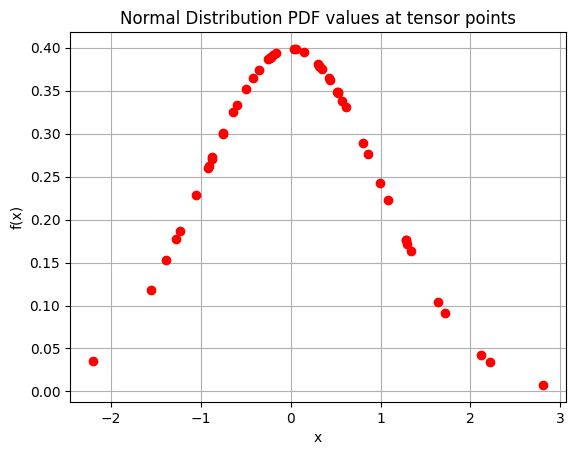

In [274]:
def normal_distribution(x: torch.Tensor):  # input should be a tensor
    return 1/(torch.sqrt(2*torch.tensor(torch.pi)))*torch.exp(-x**2/2)

# Compute PDF values with tensor input
y = normal_distribution(X1_norm)

# Convert to numpy for matplotlib
plt.plot(X1_norm.numpy(), y.numpy(), 'ro')  # 'ro' is red dots
plt.title("Normal Distribution PDF values at tensor points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


In [ ]:
def normal_distribution(x: float): # normal distribution of mean 0 and std 1
    x_tensor = torch.tensor(x)  # convert to tensor
    result = 1/(torch.sqrt(2*torch.pi))*torch.exp(-x_tensor**2/2)
    return result.item()  # return as a float


### Putting tensors on the GPU

In [278]:
torch.cuda.is_available() #Cuda(GPU) is not available, so it's cpu always, use google collab if you must use a gpu.

device='cuda' if torch.cuda.is_available()  else 'cpu'
device

'cpu'

In [277]:
torch.cuda.device_count()

0

In [280]:
#Move tensor to GPU if available

X=torch.tensor([1,4,5])
X_to_device=X.to(device) #no change will happen because there is no GPU
X_to_device, X_to_device.device

(tensor([1, 4, 5]), device(type='cpu'))

### numpy does not work with gpu. meaning if you want to transform a tensor into a numpy elt, you must insure that it is on cpu first. X.cpu.numpy()

## Summary

The tensor class is the main interface for storing and manipulating data in deep learning libraries.
Tensors provide a variety of functionalities including construction routines; indexing and slicing; basic mathematics operations; broadcasting; memory-efficient assignment; and conversion to and from other Python objects.


## Exercises

1. Run the code in this section. Change the conditional statement `X == Y` to `X < Y` or `X > Y`, and then see what kind of tensor you can get.
1. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?


[Discussions](https://discuss.d2l.ai/t/27)
